# Question 1: Preprocessing

Preprocess the text by removing unwanted characters, tokenizing sentences and words, removing stopwords, stemming, and lemmatizing.

In [16]:
import os
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, SnowballStemmer
from wordcloud import WordCloud
import spacy
import matplotlib.pyplot as plt
from collections import Counter

# Ensure necessary NLTK downloads
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize Spacy for lemmatization
nlp = spacy.load('en_core_web_sm')

# Define preprocessing function
def preprocess_text(text):
    # Remove unwanted characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Sentence and word tokenization
    sentences = sent_tokenize(text)
    words = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word.lower() not in stop_words]
    
    # Stemming
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in filtered_words]
    
    # Lemmatization
    lemmatized_words = [token.lemma_ for token in nlp(' '.join(filtered_words))]
    
    return {
        'sentences': sentences,
        'words': words,
        'filtered_words': filtered_words,
        'stemmed_words': stemmed_words,
        'lemmatized_words': lemmatized_words
    }

# Read articles from folders
article_dirs = ['Article1', 'Article2', 'Article3', 'Article4']
articles = {}

for dir_name in article_dirs:
    file_path = f'/Users/sumith/Desktop/sem4/ADA/LAB/LAB3/{dir_name}.txt'
    with open(file_path, 'r') as file:
        articles[dir_name] = file.read()

# Preprocess articles
preprocessed_articles = {name: preprocess_text(content) for name, content in articles.items()}

# Display preprocessing results
preprocessed_articles

[nltk_data] Downloading package punkt to /Users/sumith/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sumith/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/sumith/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/sumith/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


{'Article1': {'sentences': ['Operation Sindoor called and we delivered Gautam Adani on Adani Defences role in Indias counterstrike\n\n\nGautam Adani announced on Tuesday that the drones and antidrone systems manufactured by his company were crucial in Operation Sindoor This operation was a counterterror strike by the Indian Armed Forces in response to the Pahalgam terror attack\n\n\nSpeaking at the annual shareholder meeting Adani stated Operation Sindoor called and we delivered\n\n\nAccording to Adani the loitering munitions made by Adani Defence carried out precise strikes while their counterdrone units protected Indian assets from potential retaliatory actions'],
  'words': ['Operation',
   'Sindoor',
   'called',
   'and',
   'we',
   'delivered',
   'Gautam',
   'Adani',
   'on',
   'Adani',
   'Defences',
   'role',
   'in',
   'Indias',
   'counterstrike',
   'Gautam',
   'Adani',
   'announced',
   'on',
   'Tuesday',
   'that',
   'the',
   'drones',
   'and',
   'antidrone',


### Interpretation for Question 1

The preprocessing step removes unwanted characters, tokenizes sentences and words, removes stopwords, and applies stemming and lemmatization. This ensures the text is clean and ready for further analysis. The output includes the number of sentences, words, filtered words, stemmed words, and lemmatized words for each document.

# Question 2: Top 10 Most Frequent Stems

Extract and display the top 10 most frequent stemmed tokens for each document.

In [17]:
# Extract top 10 most frequent stems for each document
top_stems = {}

for name, data in preprocessed_articles.items():
    stemmed_words = data['stemmed_words']
    stem_counts = Counter(stemmed_words)
    top_stems[name] = stem_counts.most_common(10)

# Display top stems
top_stems

{'Article1': [('adani', 6),
  ('oper', 4),
  ('sindoor', 3),
  ('call', 2),
  ('deliv', 2),
  ('gautam', 2),
  ('defenc', 2),
  ('strike', 2),
  ('indian', 2),
  ('role', 1)],
 'Article2': [('defenc', 3),
  ('minist', 3),
  ('oper', 3),
  ('sindoor', 3),
  ('presid', 3),
  ('murmu', 3),
  ('arm', 2),
  ('forc', 2),
  ('singh', 2),
  ('said', 2)],
 'Article3': [('system', 7),
  ('loiter', 4),
  ('munit', 4),
  ('night', 3),
  ('nagastra', 3),
  ('oper', 3),
  ('nagastrar', 3),
  ('target', 3),
  ('solar', 2),
  ('aerospac', 2)],
 'Article4': [('adani', 7),
  ('oper', 6),
  ('sindoor', 3),
  ('drone', 2),
  ('antidron', 2),
  ('system', 2),
  ('strike', 2),
  ('indian', 2),
  ('forc', 2),
  ('respons', 2)]}

### Interpretation for Question 2

The top 10 most frequent stems for each document provide insight into the most commonly used root forms of words. This helps identify key themes and topics within each document.

# Question 3: Jaccard Similarity Matrix

Compare the vocabulary overlap between any two documents using Jaccard Similarity. Create and display a similarity matrix.

In [18]:
# Compute Jaccard similarity matrix
def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union

similarity_matrix = {}

for name1, data1 in preprocessed_articles.items():
    similarity_matrix[name1] = {}
    set1 = set(data1['filtered_words'])
    for name2, data2 in preprocessed_articles.items():
        set2 = set(data2['filtered_words'])
        similarity_matrix[name1][name2] = jaccard_similarity(set1, set2)

# Display similarity matrix
similarity_matrix

{'Article1': {'Article1': 1.0,
  'Article2': 0.06474820143884892,
  'Article3': 0.06428571428571428,
  'Article4': 0.411214953271028},
 'Article2': {'Article1': 0.06474820143884892,
  'Article2': 1.0,
  'Article3': 0.04145077720207254,
  'Article4': 0.07407407407407407},
 'Article3': {'Article1': 0.06428571428571428,
  'Article2': 0.04145077720207254,
  'Article3': 1.0,
  'Article4': 0.05699481865284974},
 'Article4': {'Article1': 0.411214953271028,
  'Article2': 0.07407407407407407,
  'Article3': 0.05699481865284974,
  'Article4': 1.0}}

### Interpretation for Question 3

The Jaccard similarity matrix compares the vocabulary overlap between documents. A higher similarity score indicates greater overlap in the filtered vocabulary, which can suggest similar topics or themes between documents.

# Question 4: Word Clouds

Generate a Word Cloud for the final vocabulary of each document after stop word removal, stemming, and lemmatization.

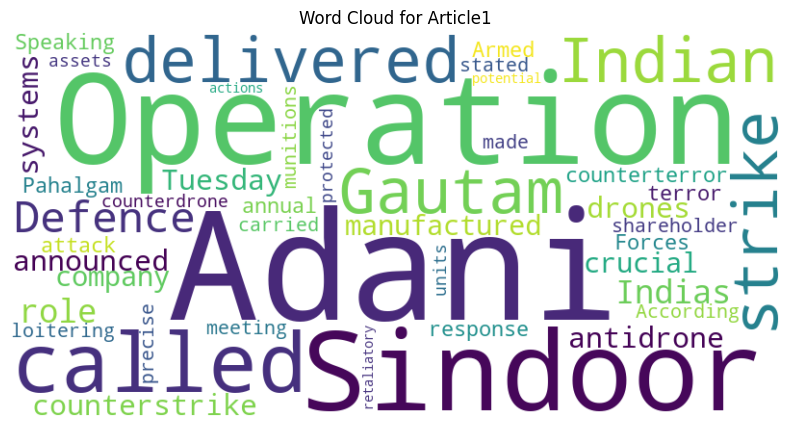

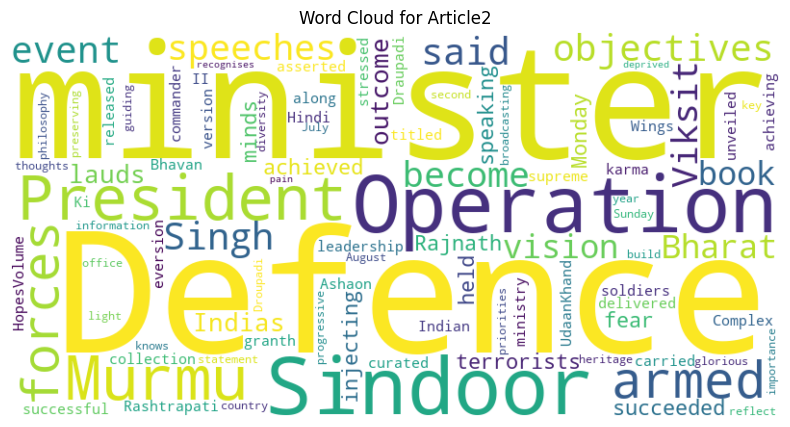

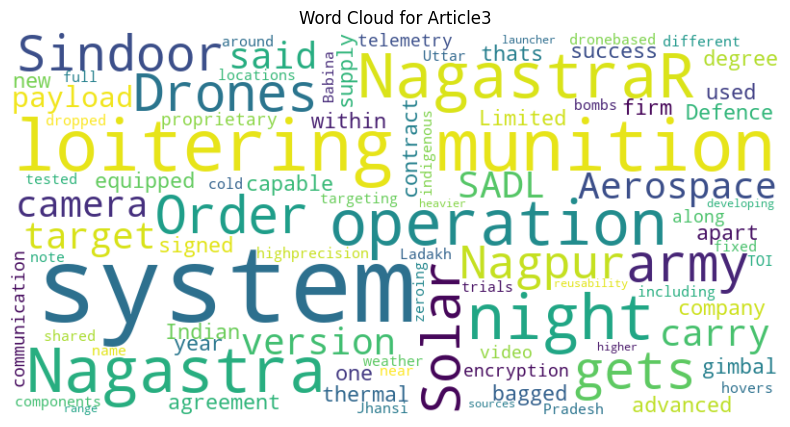

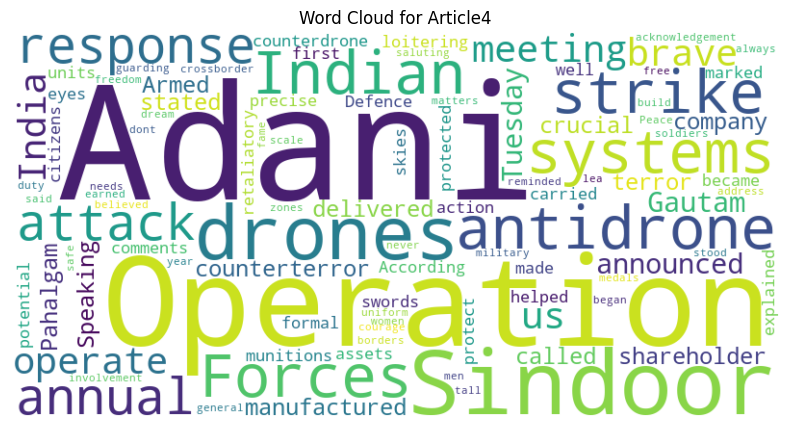

In [19]:
# Generate Word Clouds for each document
wordclouds = {}

for name, data in preprocessed_articles.items():
    final_words = ' '.join(data['filtered_words'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(final_words)
    wordclouds[name] = wordcloud
    
    # Display Word Cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {name}')
    plt.show()

### Interpretation for Question 4

The Word Clouds visually represent the most frequent words in each document after preprocessing. Larger words in the Word Cloud indicate higher frequency, providing a quick overview of the document's key vocabulary.

# Question 5: Bar Charts of Top 5 Tokens

Generate a Bar Chart of the 5 most common tokens in each document.

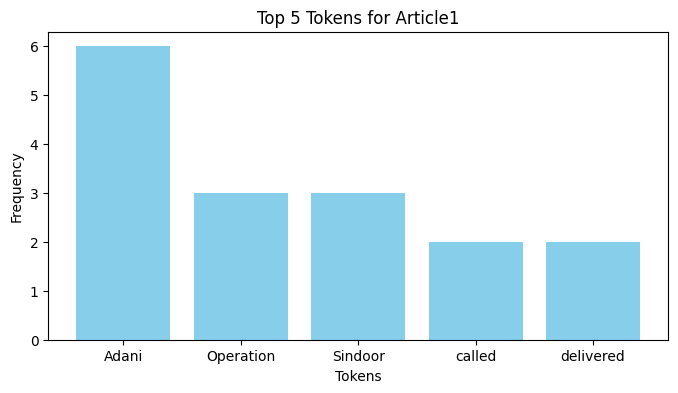

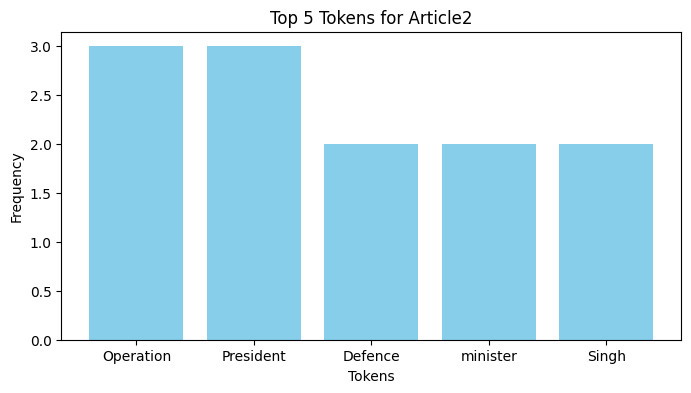

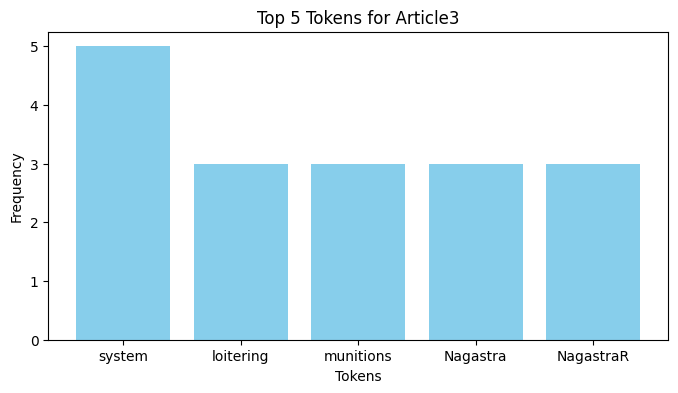

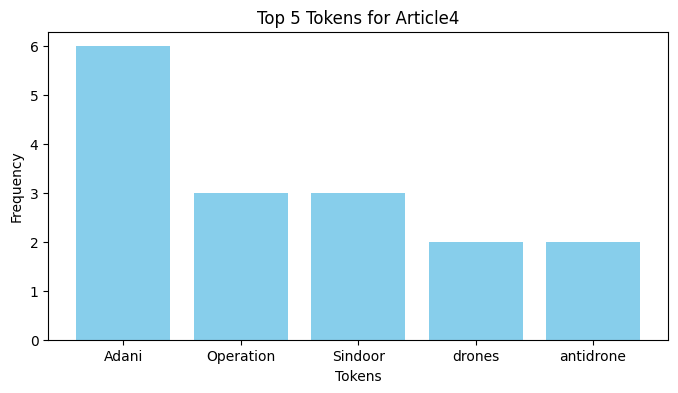

In [20]:
# Generate Bar Charts for top 5 tokens
top_tokens = {}

for name, data in preprocessed_articles.items():
    token_counts = Counter(data['filtered_words'])
    top_tokens[name] = token_counts.most_common(5)
    
    # Display Bar Chart
    tokens, counts = zip(*top_tokens[name])
    plt.figure(figsize=(8, 4))
    plt.bar(tokens, counts, color='skyblue')
    plt.title(f'Top 5 Tokens for {name}')
    plt.xlabel('Tokens')
    plt.ylabel('Frequency')
    plt.show()

### Interpretation for Question 5

The bar charts display the top 5 tokens for each document, showing their frequency. This helps identify the most prominent words in each document and provides a quantitative view of the vocabulary.

# Question 6: Top 5 Stems and Inferred Topics

Identify common topics or themes using the most frequent stems after preprocessing. For each document, list the top 5 stems and infer the likely topic.

In [21]:
# Identify top 5 stems and infer topics
top_stems_topics = {}

for name, data in preprocessed_articles.items():
    stem_counts = Counter(data['stemmed_words'])
    top_stems = stem_counts.most_common(5)
    
    # Infer topic based on stems
    inferred_topic = ' '.join([stem for stem, _ in top_stems])
    top_stems_topics[name] = {
        'top_stems': top_stems,
        'inferred_topic': inferred_topic
    }

# Display top stems and inferred topics
top_stems_topics

{'Article1': {'top_stems': [('adani', 6),
   ('oper', 4),
   ('sindoor', 3),
   ('call', 2),
   ('deliv', 2)],
  'inferred_topic': 'adani oper sindoor call deliv'},
 'Article2': {'top_stems': [('defenc', 3),
   ('minist', 3),
   ('oper', 3),
   ('sindoor', 3),
   ('presid', 3)],
  'inferred_topic': 'defenc minist oper sindoor presid'},
 'Article3': {'top_stems': [('system', 7),
   ('loiter', 4),
   ('munit', 4),
   ('night', 3),
   ('nagastra', 3)],
  'inferred_topic': 'system loiter munit night nagastra'},
 'Article4': {'top_stems': [('adani', 7),
   ('oper', 6),
   ('sindoor', 3),
   ('drone', 2),
   ('antidron', 2)],
  'inferred_topic': 'adani oper sindoor drone antidron'}}

### Interpretation for Question 6

The top 5 stems for each document highlight the most frequently used root forms of words. Based on these stems, inferred topics provide a thematic summary of each document, offering insights into its main subject matter.